In [1]:
%load_ext autoreload
%autoreload 5

In [40]:
from utils.query_utils import athena_query_to_df
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.pyplot import figure

In [13]:
win_loss_query = """select "date", white, black, "result", 1 as count,
case
	when white = 'luckleland' and result = '1-0' then 1
	when black = 'luckleland' and result = '0-1' then 1
	else 0 
end as "win",
case
	when black = 'luckleland' and result = '1-0' then 1
	when white = 'luckleland' and result = '0-1' then 1
	else 0
end as "loss",
gamestring, id_key
from lichess.lichess_api_data
order by date desc"""

df = athena_query_to_df(win_loss_query)

In [16]:
results_df = df[['date', 'win', 'loss','count']].groupby('date').sum().sort_values('date', ascending= False)

In [34]:
x_list = list(results_df.index)
x_list = [datetime.strptime(x, "%Y-%m-%d") for x in x_list]

In [36]:
y_list = list(results_df['count'])

In [50]:
win_percent = list(results_df['win']/results_df['count'] * 100)

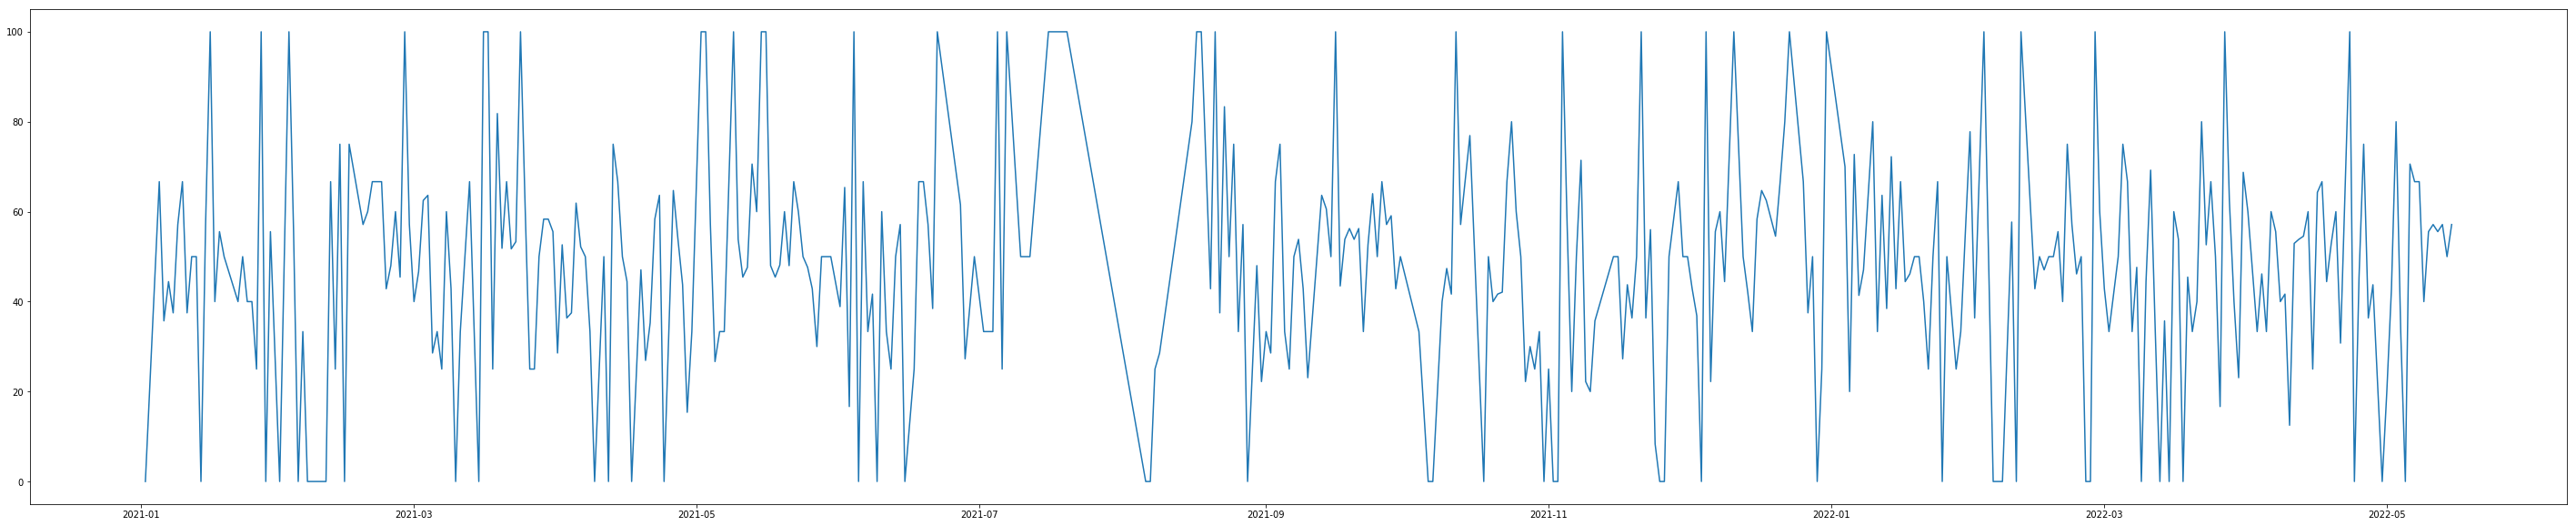

In [52]:
# plt.plot(x_list, y_list)
plt.plot(x_list, win_percent)

plt.rcParams["figure.figsize"] = (50,10)

In [53]:
plt.show()